<a href="https://colab.research.google.com/github/jhonda18/Python3/blob/main/Clase_6_20210529.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase de hoy

* Hoy vamos a ver Outliers, como detectarlos y como tratarlos.

## Outliers
En estadística, un valor atípico es un punto de observación que está distante de otras observaciones.

### Identificar Outlier un enfoque univariado
* Diagrama de caja y bigotes (Boxplot).
* Z-Score (La regla de las tres sigmas).
* IQR Score

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings(action="ignore")
pd.set_option("float_format", "{:.2f}".format)

In [ ]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/stivenlopezg/Modulo-Python-3/master/data/diabetes.csv",
                       dtype={"PatientID": "category", "Diabetic": "category"})
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.51,1.21,21,0
1,1147438,8,92,93,47,36,21.24,0.16,23,0
2,1640031,7,115,47,52,35,41.51,0.08,23,0
3,1883350,9,103,78,25,304,29.58,1.28,43,1
4,1424119,1,85,59,27,35,42.60,0.55,22,0


In [ ]:
# map, apply

diabetes["Diabetic"] = diabetes["Diabetic"].map({"0": "No", "1": "Si"})

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PatientID               15000 non-null  category
 1   Pregnancies             15000 non-null  int64   
 2   PlasmaGlucose           15000 non-null  int64   
 3   DiastolicBloodPressure  15000 non-null  int64   
 4   TricepsThickness        15000 non-null  int64   
 5   SerumInsulin            15000 non-null  int64   
 6   BMI                     15000 non-null  float64 
 7   DiabetesPedigree        15000 non-null  float64 
 8   Age                     15000 non-null  int64   
 9   Diabetic                15000 non-null  category
dtypes: category(2), float64(2), int64(6)
memory usage: 1.7 MB


In [ ]:
numerical_features = diabetes.select_dtypes(include="number").columns.tolist()
numerical_features

['Pregnancies',
 'PlasmaGlucose',
 'DiastolicBloodPressure',
 'TricepsThickness',
 'SerumInsulin',
 'BMI',
 'DiabetesPedigree',
 'Age']

Sobre las variables numericas:

* Histogramas.
* Boxplot.

Para la columna PlasmaGlucose: 



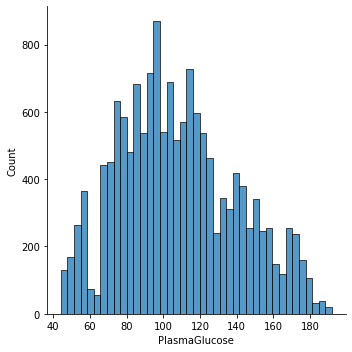

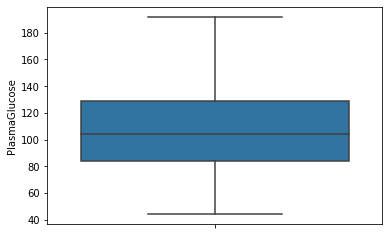

-----------------------------------------------------------------
Para la columna DiastolicBloodPressure: 



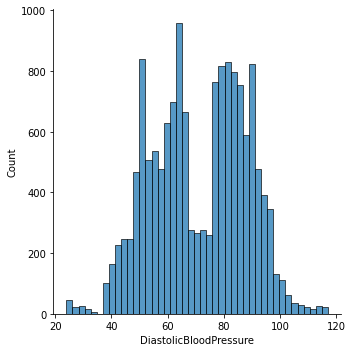

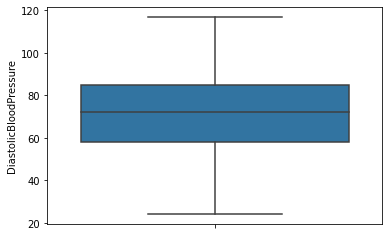

-----------------------------------------------------------------
Para la columna TricepsThickness: 



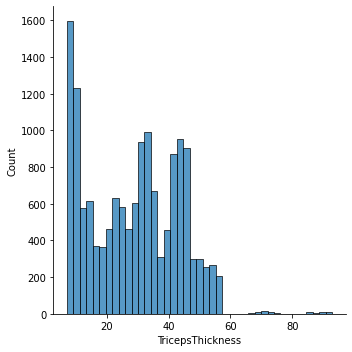

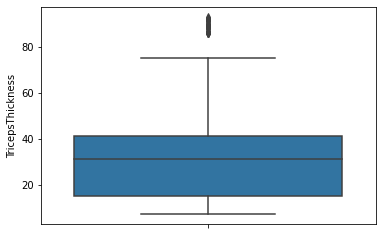

-----------------------------------------------------------------
Para la columna SerumInsulin: 



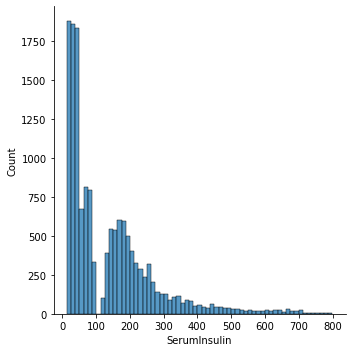

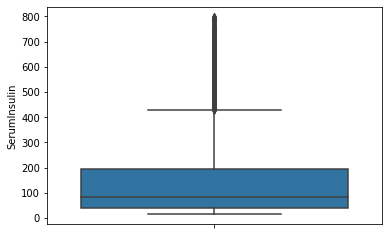

-----------------------------------------------------------------
Para la columna BMI: 



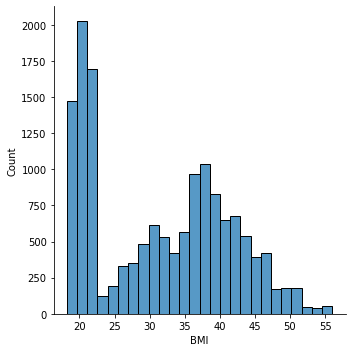

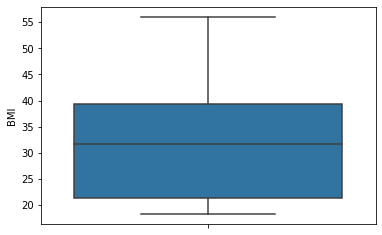

-----------------------------------------------------------------
Para la columna DiabetesPedigree: 



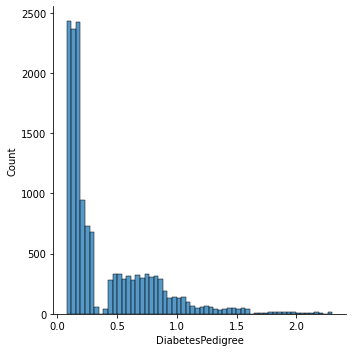

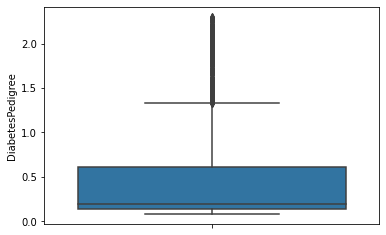

-----------------------------------------------------------------


In [ ]:
for col in numerical_features:
  if col in ["Pregnancies", "Age"]:
    continue
  else:
    print(f"Para la columna {col}: \n")
    sns.displot(data=diabetes, x=col)
    plt.show()
    sns.boxplot(data=diabetes, y=col)
    plt.show()
    print("-----------------------------------------------------------------")

In [ ]:
iqr_features = ["DiabetesPedigree", "SerumInsulin", "TricepsThickness"]
zscore_features = [col for col in numerical_features if col not in iqr_features]

In [ ]:
iqr_features

['DiabetesPedigree', 'SerumInsulin', 'TricepsThickness']

In [ ]:
for col in ["Pregnancies", "Age"]:
  zscore_features.remove(col)

In [ ]:
zscore_features

['PlasmaGlucose', 'DiastolicBloodPressure', 'BMI']

## Z-Score

In [ ]:
# upper = mean(datos) + 3 * std(datos)
# lower = mean(datos) - 3 * std(datos)

from sklearn.preprocessing import StandardScaler

In [ ]:
standard = StandardScaler()

standard.fit(diabetes[zscore_features])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
for col, mean, std in zip(zscore_features, standard.mean_, standard.scale_):
  print(f"Para la columna {col}:")
  print(f"El promedio es: {mean}")
  print(f"La desviacion es: {std} \n")

Para la columna PlasmaGlucose:
El promedio es: 107.85686666666666
La desviacion es: 31.98090856822065 

Para la columna DiastolicBloodPressure:
El promedio es: 71.22066666666667
La desviacion es: 16.758157403353017 

Para la columna BMI:
El promedio es: 31.509646041017337
La desviacion es: 9.758674428638933 



In [ ]:
diabetes.loc[:, zscore_features] = standard.transform(diabetes[zscore_features])

In [ ]:
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,1.97,0.52,34,23,1.23,1.21,21,No
1,1147438,8,-0.50,1.30,47,36,-1.05,0.16,23,No
2,1640031,7,0.22,-1.45,52,35,1.02,0.08,23,No
3,1883350,9,-0.15,0.40,25,304,-0.20,1.28,43,Si
4,1424119,1,-0.71,-0.73,27,35,1.14,0.55,22,No


In [ ]:
for col in zscore_features:
  diabetes[f"{col}_dummy"] = diabetes[col].apply(lambda x: 0 if -3 <= x <= 3 else 1)

diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,PlasmaGlucose_dummy,DiastolicBloodPressure_dummy,BMI_dummy
0,1354778,0,1.97,0.52,34,23,1.23,1.21,21,0,0,0,0
1,1147438,8,-0.50,1.30,47,36,-1.05,0.16,23,0,0,0,0
2,1640031,7,0.22,-1.45,52,35,1.02,0.08,23,0,0,0,0
3,1883350,9,-0.15,0.40,25,304,-0.20,1.28,43,1,0,0,0
4,1424119,1,-0.71,-0.73,27,35,1.14,0.55,22,0,0,0,0


In [ ]:
diabetes.loc[:, zscore_features] = standard.inverse_transform(diabetes[zscore_features])

diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,PlasmaGlucose_dummy,DiastolicBloodPressure_dummy,BMI_dummy
0,1354778,0,171.00,80.00,34,23,43.51,1.21,21,0,0,0,0
1,1147438,8,92.00,93.00,47,36,21.24,0.16,23,0,0,0,0
2,1640031,7,115.00,47.00,52,35,41.51,0.08,23,0,0,0,0
3,1883350,9,103.00,78.00,25,304,29.58,1.28,43,1,0,0,0
4,1424119,1,85.00,59.00,27,35,42.60,0.55,22,0,0,0,0


## IQR

In [ ]:
from collections import Counter

In [ ]:
# upper = q3 + 1.5 * iqr
# lower = q1 - 1.5 * iqr

# iqr = q3 - q1

q3 = diabetes[iqr_features].quantile(0.75).to_dict()
q1 = diabetes[iqr_features].quantile(0.25).to_dict()

iqr = dict(Counter(q3) - Counter(q1))

print(q3)
print(q1)
print(iqr)

{'DiabetesPedigree': 0.61628511875, 'SerumInsulin': 195.0, 'TricepsThickness': 41.0}
{'DiabetesPedigree': 0.137743321, 'SerumInsulin': 39.0, 'TricepsThickness': 15.0}
{'DiabetesPedigree': 0.47854179775000005, 'SerumInsulin': 156.0, 'TricepsThickness': 26.0}


In [ ]:
q3["SerumInsulin"]

195.0

In [ ]:
 for col in iqr.keys():
   diabetes[f"{col}_dummy"] = diabetes[col].apply(lambda x: 1 if x > q3[col] + 1.5 * iqr[col] else 
                                                  (1 if x < q1[col] - 1.5 * iqr[col] else 0))

In [ ]:
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,PlasmaGlucose_dummy,DiastolicBloodPressure_dummy,BMI_dummy,DiabetesPedigree_dummy,SerumInsulin_dummy,TricepsThickness_dummy
0,1354778,0,171.00,80.00,34,23,43.51,1.21,21,No,0,0,0,0,0,0
1,1147438,8,92.00,93.00,47,36,21.24,0.16,23,No,0,0,0,0,0,0
2,1640031,7,115.00,47.00,52,35,41.51,0.08,23,No,0,0,0,0,0,0
3,1883350,9,103.00,78.00,25,304,29.58,1.28,43,Si,0,0,0,0,0,0
4,1424119,1,85.00,59.00,27,35,42.60,0.55,22,No,0,0,0,0,0,0


## Tratamiento
* Elimine los datos atípicos si está seguro de que son errores.
* Impute los datos atípicos.
* Cree variables dummy.
* Si su objetivo es construir un modelo, usando algoritmos de ML, use modelos que sean robustos a los datos atípicos, como modelos basados en árbol o desde la econometría usar regresiones robustas.


In [ ]:
diabetes["TricepsThickness_dummy"].value_counts(normalize=True) * 100

0   99.79
1    0.21
Name: TricepsThickness_dummy, dtype: float64

In [ ]:
idx = diabetes[diabetes["TricepsThickness_dummy"] == 1].index.tolist()
idx 

[67,
 409,
 493,
 534,
 947,
 1092,
 1206,
 2386,
 2752,
 3237,
 5671,
 5717,
 8005,
 8769,
 8933,
 9286,
 10010,
 10658,
 11311,
 11507,
 11887,
 11889,
 12210,
 12466,
 12559,
 12761,
 12994,
 13309,
 13382,
 13742,
 14132]

In [ ]:
# Eliminar

diabetes_cleaned = diabetes.drop(idx, axis=0)

In [ ]:
diabetes_cleaned.shape[0]

14969

In [ ]:
diabetes.shape[0]

15000

In [ ]:
dummies = [col for col in diabetes.columns if col.endswith("dummy")]

for col in dummies:
  idx = diabetes[diabetes[col] == 1].index.tolist()
  diabetes.drop(idx, axis=0, inplace=True)

In [ ]:
diabetes.shape[0]

13867

In [ ]:
diabetes_cleaned = diabetes.copy()

In [ ]:
diabetes_cleaned[dummies].sum(axis=1).value_counts()

0    13867
dtype: int64

In [ ]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/stivenlopezg/Modulo-Python-3/master/data/diabetes.csv",
                       dtype={"PatientID": "category", "Diabetic": "category"})

In [ ]:
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,PlasmaGlucose_dummy,DiastolicBloodPressure_dummy,BMI_dummy,DiabetesPedigree_dummy,SerumInsulin_dummy,TricepsThickness_dummy
0,1354778,0,171.00,80.00,34,23,43.51,1.21,21,0,0,0,0,0,0,0
1,1147438,8,92.00,93.00,47,36,21.24,0.16,23,0,0,0,0,0,0,0
2,1640031,7,115.00,47.00,52,35,41.51,0.08,23,0,0,0,0,0,0,0
3,1883350,9,103.00,78.00,25,304,29.58,1.28,43,1,0,0,0,0,0,0
4,1424119,1,85.00,59.00,27,35,42.60,0.55,22,0,0,0,0,0,0,0


In [ ]:
# Imputarlos

# 1. Volver los atipicos en NaN's
# 2. Imputarlos con alguna estrategia que hayamos visto (media, mediana, moda, algun algoritmo)

idx = diabetes[diabetes["TricepsThickness_dummy"] == 1].index

In [ ]:
diabetes.loc[idx, "TricepsThickness"] = np.nan

In [ ]:
diabetes.isna().sum()

PatientID                        0
Pregnancies                      0
PlasmaGlucose                    0
DiastolicBloodPressure           0
TricepsThickness                31
SerumInsulin                     0
BMI                              0
DiabetesPedigree                 0
Age                              0
Diabetic                         0
PlasmaGlucose_dummy              0
DiastolicBloodPressure_dummy     0
BMI_dummy                        0
DiabetesPedigree_dummy           0
SerumInsulin_dummy               0
TricepsThickness_dummy           0
dtype: int64

In [ ]:
for col in dummies:
  aux = col.split("_")[0]
  idx = diabetes[diabetes[col] == 1].index
  diabetes.loc[idx, aux] = np.nan

In [ ]:
diabetes.isna().mean() * 100

PatientID                      0.00
Pregnancies                    0.00
PlasmaGlucose                  0.00
DiastolicBloodPressure         0.00
TricepsThickness               0.21
SerumInsulin                   4.44
BMI                            0.00
DiabetesPedigree               3.17
Age                            0.00
Diabetic                       0.00
PlasmaGlucose_dummy            0.00
DiastolicBloodPressure_dummy   0.00
BMI_dummy                      0.00
DiabetesPedigree_dummy         0.00
SerumInsulin_dummy             0.00
TricepsThickness_dummy         0.00
dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median').fit(diabetes)

In [ ]:
diabetes = pd.DataFrame(imputer.transform(diabetes), columns=diabetes.columns)

In [ ]:
diabetes.isna().sum()

PatientID                       0
Pregnancies                     0
PlasmaGlucose                   0
DiastolicBloodPressure          0
TricepsThickness                0
SerumInsulin                    0
BMI                             0
DiabetesPedigree                0
Age                             0
Diabetic                        0
PlasmaGlucose_dummy             0
DiastolicBloodPressure_dummy    0
BMI_dummy                       0
DiabetesPedigree_dummy          0
SerumInsulin_dummy              0
TricepsThickness_dummy          0
dtype: int64

In [ ]:
diabetes_cleaned.drop(labels=dummies, axis=1, inplace=True)
diabetes.drop(labels=dummies, axis=1, inplace=True)

In [ ]:
diabetes_cleaned

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171.00,80.00,34,23,43.51,1.21,21,No
1,1147438,8,92.00,93.00,47,36,21.24,0.16,23,No
2,1640031,7,115.00,47.00,52,35,41.51,0.08,23,No
3,1883350,9,103.00,78.00,25,304,29.58,1.28,43,Si
4,1424119,1,85.00,59.00,27,35,42.60,0.55,22,No
...,...,...,...,...,...,...,...,...,...,...
14994,1453189,0,72.00,99.00,32,32,20.93,0.55,22,No
14995,1490300,10,65.00,60.00,46,177,33.51,0.15,41,Si
14996,1744410,2,73.00,66.00,27,168,30.13,0.86,38,Si
14997,1742742,0,93.00,89.00,43,57,18.69,0.43,24,No


In [ ]:
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778.00,0.00,171.00,80.00,34.00,23.00,43.51,1.21,21.00,0.00
1,1147438.00,8.00,92.00,93.00,47.00,36.00,21.24,0.16,23.00,0.00
2,1640031.00,7.00,115.00,47.00,52.00,35.00,41.51,0.08,23.00,0.00
3,1883350.00,9.00,103.00,78.00,25.00,304.00,29.58,1.28,43.00,1.00
4,1424119.00,1.00,85.00,59.00,27.00,35.00,42.60,0.55,22.00,0.00
...,...,...,...,...,...,...,...,...,...,...
14995,1490300.00,10.00,65.00,60.00,46.00,177.00,33.51,0.15,41.00,1.00
14996,1744410.00,2.00,73.00,66.00,27.00,168.00,30.13,0.86,38.00,1.00
14997,1742742.00,0.00,93.00,89.00,43.00,57.00,18.69,0.43,24.00,0.00
14998,1099353.00,0.00,132.00,98.00,18.00,161.00,19.79,0.30,23.00,0.00
